In [76]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,\
  mean_squared_error



In [50]:
train = pd.read_csv(r'C:\Users\Shweta\Documents\gitrepo\Capstonetwo\train.csv')
test = pd.read_csv(r'C:\Users\Shweta\Documents\gitrepo\Capstonetwo\test.csv')

In [51]:
train.head()

,StartDate,Total_Accidents,Total_Accs-30,Temperature(F)+1,Humidity(%)+1,Pressure(in)+1,Visibility(mi)+1,Wind_Speed(mph)+1
0,2016-05-01,3,12.0,62.633333,62.666667,29.816667,10.000000,4.050000
1,2016-05-02,8,0.0,66.700000,62.666667,29.886667,10.000000,3.500000
2,2016-05-03,10,1.0,68.912500,58.750000,29.962500,9.875000,7.380000
3,2016-05-04,9,5.0,69.000000,62.200000,29.927000,9.600000,5.114286
4,2016-05-05,9,10.0,61.122222,77.111111,29.933333,7.388889,5.080000


In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StartDate          730 non-null    object 
 1   Total_Accidents    730 non-null    int64  
 2   Total_Accs-30      730 non-null    float64
 3   Temperature(F)+1   730 non-null    float64
 4   Humidity(%)+1      730 non-null    float64
 5   Pressure(in)+1     730 non-null    float64
 6   Visibility(mi)+1   730 non-null    float64
 7   Wind_Speed(mph)+1  730 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 45.8+ KB


In [53]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StartDate          31 non-null     object 
 1   Total_Accidents    31 non-null     int64  
 2   Total_Accs-30      31 non-null     float64
 3   Temperature(F)+1   31 non-null     float64
 4   Humidity(%)+1      31 non-null     float64
 5   Pressure(in)+1     31 non-null     float64
 6   Visibility(mi)+1   31 non-null     float64
 7   Wind_Speed(mph)+1  31 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 2.1+ KB


In [54]:
test.head()

,StartDate,Total_Accidents,Total_Accs-30,Temperature(F)+1,Humidity(%)+1,Pressure(in)+1,Visibility(mi)+1,Wind_Speed(mph)+1
0,2018-05-01,11,0.0,62.666667,64.111111,29.918889,10.000000,5.928571
1,2018-05-02,9,10.0,57.727273,67.454545,29.883636,9.272727,4.350000
2,2018-05-03,5,9.0,58.677778,68.555556,30.105556,10.000000,3.500000
3,2018-05-04,5,5.0,66.020000,57.000000,30.132000,10.000000,5.320000
4,2018-05-05,1,6.0,82.240000,33.600000,30.054000,10.000000,4.600000


### Defining the target variable

To predict the number of total accidents, the target variable will the column -Total_Accidents. 

In [55]:
y_train = train['Total_Accidents']
y_test = test['Total_Accidents']

In [56]:
x_train = train

In [57]:
x_train.drop('Total_Accidents',axis =1, inplace = True)

In [58]:
x_test = test
x_test.drop('Total_Accidents', axis=1, inplace=True)

In [59]:
x_train.head()

,StartDate,Total_Accs-30,Temperature(F)+1,Humidity(%)+1,Pressure(in)+1,Visibility(mi)+1,Wind_Speed(mph)+1
0,2016-05-01,12.0,62.633333,62.666667,29.816667,10.000000,4.050000
1,2016-05-02,0.0,66.700000,62.666667,29.886667,10.000000,3.500000
2,2016-05-03,1.0,68.912500,58.750000,29.962500,9.875000,7.380000
3,2016-05-04,5.0,69.000000,62.200000,29.927000,9.600000,5.114286
4,2016-05-05,10.0,61.122222,77.111111,29.933333,7.388889,5.080000


In [60]:
x_test.head()

,StartDate,Total_Accs-30,Temperature(F)+1,Humidity(%)+1,Pressure(in)+1,Visibility(mi)+1,Wind_Speed(mph)+1
0,2018-05-01,0.0,62.666667,64.111111,29.918889,10.000000,5.928571
1,2018-05-02,10.0,57.727273,67.454545,29.883636,9.272727,4.350000
2,2018-05-03,9.0,58.677778,68.555556,30.105556,10.000000,3.500000
3,2018-05-04,5.0,66.020000,57.000000,30.132000,10.000000,5.320000
4,2018-05-05,6.0,82.240000,33.600000,30.054000,10.000000,4.600000


In [61]:
y_train.shape

(730,)

In [62]:
y_test.shape

(31,)

In [63]:
x_train.set_index('StartDate', inplace=True)
x_test.set_index('StartDate', inplace=True)

In [64]:
x_train.shape

(730, 6)

In [65]:
x_train.head()

,Total_Accs-30,Temperature(F)+1,Humidity(%)+1,Pressure(in)+1,Visibility(mi)+1,Wind_Speed(mph)+1
StartDate,,,,,,
2016-05-01,12.0,62.633333,62.666667,29.816667,10.000000,4.050000
2016-05-02,0.0,66.700000,62.666667,29.886667,10.000000,3.500000
2016-05-03,1.0,68.912500,58.750000,29.962500,9.875000,7.380000
2016-05-04,5.0,69.000000,62.200000,29.927000,9.600000,5.114286
2016-05-05,10.0,61.122222,77.111111,29.933333,7.388889,5.080000


In [66]:
x_test.shape

(31, 6)

In [67]:
x_test.head()

,Total_Accs-30,Temperature(F)+1,Humidity(%)+1,Pressure(in)+1,Visibility(mi)+1,Wind_Speed(mph)+1
StartDate,,,,,,
2018-05-01,0.0,62.666667,64.111111,29.918889,10.000000,5.928571
2018-05-02,10.0,57.727273,67.454545,29.883636,9.272727,4.350000
2018-05-03,9.0,58.677778,68.555556,30.105556,10.000000,3.500000
2018-05-04,5.0,66.020000,57.000000,30.132000,10.000000,5.320000
2018-05-05,6.0,82.240000,33.600000,30.054000,10.000000,4.600000


In [68]:
x_train.isnull().sum()

Total_Accs-30        0
Temperature(F)+1     0
Humidity(%)+1        0
Pressure(in)+1       0
Visibility(mi)+1     0
Wind_Speed(mph)+1    0
dtype: int64

In [69]:
x_test.isnull().sum()

Total_Accs-30        0
Temperature(F)+1     0
Humidity(%)+1        0
Pressure(in)+1       0
Visibility(mi)+1     0
Wind_Speed(mph)+1    0
dtype: int64

### Defining evaluation metrics and plots

Lets create a series which will store all the dates of the test data.

In [78]:
copy_test=x_test
testing_dates = copy_test.index

In [83]:
testing_dates.to_series()

StartDate
2018-05-01    2018-05-01
2018-05-02    2018-05-02
2018-05-03    2018-05-03
2018-05-04    2018-05-04
2018-05-05    2018-05-05
2018-05-06    2018-05-06
2018-05-07    2018-05-07
2018-05-08    2018-05-08
2018-05-09    2018-05-09
2018-05-10    2018-05-10
2018-05-11    2018-05-11
2018-05-12    2018-05-12
2018-05-13    2018-05-13
2018-05-14    2018-05-14
2018-05-15    2018-05-15
2018-05-16    2018-05-16
2018-05-17    2018-05-17
2018-05-18    2018-05-18
2018-05-19    2018-05-19
2018-05-20    2018-05-20
2018-05-21    2018-05-21
2018-05-22    2018-05-22
2018-05-23    2018-05-23
2018-05-24    2018-05-24
2018-05-25    2018-05-25
2018-05-26    2018-05-26
2018-05-27    2018-05-27
2018-05-28    2018-05-28
2018-05-29    2018-05-29
2018-05-30    2018-05-30
2018-05-31    2018-05-31
Name: StartDate, dtype: object

In [88]:
def evaluate_model(y_test, y_pred):
  print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
  print(f"MSE: {mean_squared_error(y_test, y_pred)}")
  print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred)}")
  rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
  print("\nRMSE: ", rmse)

In [89]:
def plot_predictions(testing_dates, y_test, y_pred):
  df_test = pd.DataFrame({"date": testing_dates, "actual": y_test, "prediction": y_pred })
  figure, ax = plt.subplots(figsize=(10, 5))
  df_test.plot(ax=ax, label="Actual", x="date", y="actual")
  df_test.plot(ax=ax, label="Prediction", x="date", y="prediction")
  plt.legend(["Actual", "Prediction"])
  plt.show()

### Modeling and Cross validation

#### Random Forest 

In [104]:
# Fitting Random Forest Regression to the dataset

model = RandomForestRegressor()
parameters = {
    "max_depth": [3, 4, 6, 5],
    "n_estimators": [100, 300, 500, 700],
}


grid_search = GridSearchCV(estimator=model, param_grid=parameters)
grid_search.fit(x_train, y_train)
print('Completed training the model')
 

Completed training the model


In [106]:
# Evaluating GridSearch results
print('Starting prediction...')
y_pred = grid_search.predict(x_test)



Starting prediction...


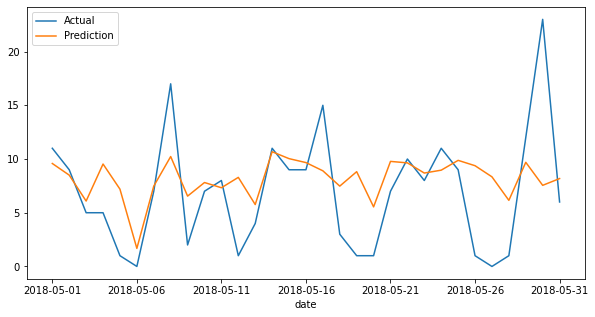

In [107]:
plot_predictions(testing_dates, y_test, y_pred)

In [108]:
evaluate_model(y_test, y_pred)

MAE: 3.589146477548228
MSE: 24.461297935036185
MAPE: 1456071623163519.5

RMSE:  4.946


#### XGBoost

In [93]:
model = XGBRegressor()
parameters = {
    "max_depth": [3, 4, 6, 5],
    "n_estimators": [100, 300, 500, 700],
}


grid_search = GridSearchCV(estimator=model, param_grid=parameters, verbose=2)
grid_search.fit(x_train, y_train, verbose=False)
print('Completed training the model')

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ......................max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ......................max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ......................max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ......................max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ......................max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ......................max_depth=3, n_estimators=300; total time=   0.6s
[CV] END ......................max_depth=3, n_estimators=300; total time=   0.6s
[CV] END ......................max_depth=3, n_estimators=300; total time=   0.6s
[CV] END ......................max_depth=3, n_estimators=300; total time=   0.6s
[CV] END ......................max_depth=3, n_estimators=300; total time=   0.6s
[CV] END ......................max_depth=3, n_estimators=500; total time=   1.0s
[CV] END ......................max_depth=3, n_es

In [94]:
# Evaluating GridSearch results
print('Starting prediction...')
y_pred = grid_search.predict(x_test)




Starting prediction...


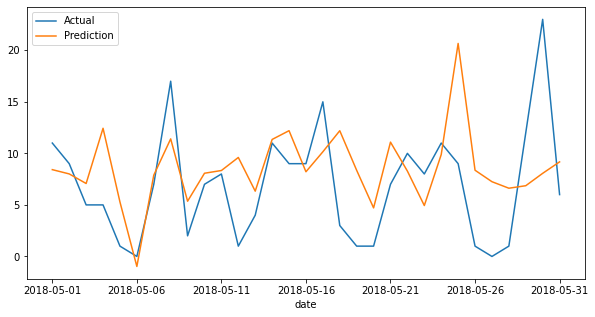

In [95]:
plot_predictions(testing_dates, y_test, y_pred)

In [96]:
evaluate_model(y_test, y_pred)

MAE: 4.358068602700388
MSE: 31.024406097026578
MAPE: 1194353364041729.5

RMSE:  5.57


#### LightGBM 

In [97]:
# LGBM

model = lgb.LGBMRegressor()
parameters = {
    "max_depth": [3, 4, 6, 5],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "n_estimators": [100, 300, 500, 700]
}


grid_search = GridSearchCV(estimator=model, param_grid=parameters, verbose = 2)
grid_search.fit(x_train, y_train, verbose = False)
print('Completed training the model')

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.2s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.2s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.2s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.2s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.2s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=   0.3s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=   0.4s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=   0.4s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=   0.3s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=   0.4s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=700; total time=   0.5s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=700; total time=   0.5s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=700; total time=   0.5s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=700; total time=   0.4s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=700; total time=   0.5s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.0s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.1s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.1s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=300; total time=   0.3s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=300; total time=   0.3s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=300; total time=   0.3s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=300; total time=   0.3s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=300; total time=   0.3s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=500; total time=   0.5s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=500; total time=   0.5s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=500; total time=   0.5s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=500; total time=   0.5s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=500; total time=   0.5s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=700; total time=   0.7s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=700; total time=   0.7s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=700; total time=   0.6s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=700; total time=   0.7s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=700; total time=   0.7s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=100; total time=   0.1s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=100; total time=   0.1s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=100; total time=   0.1s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=100; total time=   0.1s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=100; total time=   0.2s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=300; total time=   0.4s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=300; total time=   0.4s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=300; total time=   0.4s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=300; total time=   0.4s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=300; total time=   0.5s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=500; total time=   0.7s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=500; total time=   0.8s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=500; total time=   0.9s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=500; total time=   0.9s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=500; total time=   0.7s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=700; total time=   0.9s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=700; total time=   1.1s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=700; total time=   1.0s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=700; total time=   1.0s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=700; total time=   1.0s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.1s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.1s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.1s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.1s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=300; total time=   0.3s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=300; total time=   0.3s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=300; total time=   0.4s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=300; total time=   0.5s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=300; total time=   0.5s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=500; total time=   0.6s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=500; total time=   0.6s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=500; total time=   0.8s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=500; total time=   0.8s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=500; total time=   0.7s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=700; total time=   0.8s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=700; total time=   0.7s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=700; total time=   0.7s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=700; total time=   0.7s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=700; total time=   0.8s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.0s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.0s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future releas

[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=300; total time=   0.2s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=300; total time=   0.2s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=300; total time=   0.1s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=300; total time=   0.2s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=300; total time=   0.2s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=500; total time=   0.3s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=500; total time=   0.3s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=500; total time=   0.3s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=500; total time=   0.3s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=500; total time=   0.3s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=700; total time=   0.4s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=700; total time=   0.4s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=700; total time=   0.5s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=700; total time=   0.5s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=700; total time=   0.4s
[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=100; total time=   0.0s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=100; total time=   0.0s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=100; total time=   0.0s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=300; total time=   0.2s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=300; total time=   0.2s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=300; total time=   0.2s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=300; total time=   0.2s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=300; total time=   0.2s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=500; total time=   0.4s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=500; total time=   0.4s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=500; total time=   0.4s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=500; total time=   0.4s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=500; total time=   0.3s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=700; total time=   0.6s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=700; total time=   0.5s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=700; total time=   0.5s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=700; total time=   0.5s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=700; total time=   0.6s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=100; total time=   0.1s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=100; total time=   0.1s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=100; total time=   0.1s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=100; total time=   0.1s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=300; total time=   0.5s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=300; total time=   0.4s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=300; total time=   0.3s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=300; total time=   0.3s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=300; total time=   0.3s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=500; total time=   0.6s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=500; total time=   0.5s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=500; total time=   0.7s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=500; total time=   0.7s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=500; total time=   0.5s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=700; total time=   0.9s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=700; total time=   0.9s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=700; total time=   0.8s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=700; total time=   0.9s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=700; total time=   0.8s
[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=100; total time=   0.0s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=100; total time=   0.1s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=100; total time=   0.1s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=300; total time=   0.4s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=300; total time=   0.3s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=300; total time=   0.3s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=300; total time=   0.3s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=300; total time=   0.3s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=500; total time=   0.5s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=500; total time=   0.5s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=500; total time=   0.5s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=500; total time=   0.5s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=500; total time=   0.5s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=700; total time=   0.7s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=700; total time=   0.8s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=700; total time=   0.8s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=700; total time=   0.8s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=700; total time=   0.8s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.2s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.2s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.2s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.1s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.2s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=500; total time=   0.3s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=500; total time=   0.3s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=500; total time=   0.4s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=500; total time=   0.4s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=500; total time=   0.3s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=700; total time=   0.5s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=700; total time=   0.6s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=700; total time=   0.5s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=700; total time=   0.5s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=700; total time=   0.6s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.0s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.1s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.0s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=300; total time=   0.2s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=300; total time=   0.2s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=300; total time=   0.2s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=300; total time=   0.2s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=300; total time=   0.2s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=500; total time=   0.5s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=500; total time=   0.5s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=500; total time=   0.4s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=500; total time=   0.5s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=500; total time=   0.5s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=700; total time=   0.7s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=700; total time=   0.7s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=700; total time=   0.8s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=700; total time=   0.7s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=700; total time=   0.7s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=100; total time=   0.1s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future releas

[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=100; total time=   0.1s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=100; total time=   0.1s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=100; total time=   0.1s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=300; total time=   0.4s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=300; total time=   0.3s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=300; total time=   0.3s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=300; total time=   0.4s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=300; total time=   0.4s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=500; total time=   0.6s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=500; total time=   0.6s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=500; total time=   0.6s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=500; total time=   0.7s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=500; total time=   0.5s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=700; total time=   1.0s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=700; total time=   1.2s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=700; total time=   1.1s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=700; total time=   1.1s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=700; total time=   1.0s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   0.0s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   0.1s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   0.0s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=300; total time=   0.3s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=300; total time=   0.3s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=300; total time=   0.3s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=300; total time=   0.3s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=300; total time=   0.3s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=500; total time=   0.6s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=500; total time=   0.6s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=500; total time=   0.6s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=500; total time=   0.6s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=500; total time=   0.7s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=700; total time=   0.8s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=700; total time=   0.8s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=700; total time=   0.9s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=700; total time=   0.8s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=700; total time=   0.7s
[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.0s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.0s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.0s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=300; total time=   0.2s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=300; total time=   0.2s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=300; total time=   0.2s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=300; total time=   0.2s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=300; total time=   0.2s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=500; total time=   0.4s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=500; total time=   0.4s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=500; total time=   0.4s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=500; total time=   0.4s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=500; total time=   0.4s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=700; total time=   0.6s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=700; total time=   0.6s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=700; total time=   0.6s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=700; total time=   0.6s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=700; total time=   0.5s
[CV] END ...learning_rate=0.2, max_depth=4, n_estimators=100; total time=   0.0s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=4, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.2, max_depth=4, n_estimators=100; total time=   0.0s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.2, max_depth=4, n_estimators=100; total time=   0.0s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=4, n_estimators=300; total time=   0.3s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=4, n_estimators=300; total time=   0.3s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=4, n_estimators=300; total time=   0.3s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=4, n_estimators=300; total time=   0.2s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=4, n_estimators=300; total time=   0.3s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=4, n_estimators=500; total time=   0.6s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=4, n_estimators=500; total time=   0.4s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=4, n_estimators=500; total time=   0.4s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=4, n_estimators=500; total time=   0.5s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=4, n_estimators=500; total time=   0.5s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=4, n_estimators=700; total time=   0.8s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=4, n_estimators=700; total time=   0.7s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=4, n_estimators=700; total time=   0.8s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=4, n_estimators=700; total time=   1.0s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=4, n_estimators=700; total time=   0.7s
[CV] END ...learning_rate=0.2, max_depth=6, n_estimators=100; total time=   0.1s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=6, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.2, max_depth=6, n_estimators=100; total time=   0.1s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=6, n_estimators=100; total time=   0.1s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=6, n_estimators=100; total time=   0.1s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=6, n_estimators=300; total time=   0.5s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=6, n_estimators=300; total time=   0.5s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=6, n_estimators=300; total time=   0.4s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=6, n_estimators=300; total time=   0.7s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=6, n_estimators=300; total time=   0.5s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=6, n_estimators=500; total time=   0.8s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=6, n_estimators=500; total time=   0.8s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=6, n_estimators=500; total time=   0.6s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=6, n_estimators=500; total time=   0.6s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=6, n_estimators=500; total time=   0.7s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=6, n_estimators=700; total time=   1.1s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=6, n_estimators=700; total time=   0.9s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=6, n_estimators=700; total time=   0.8s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=6, n_estimators=700; total time=   1.0s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=6, n_estimators=700; total time=   1.0s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=100; total time=   0.1s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=100; total time=   0.1s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future releas

[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=300; total time=   0.3s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=300; total time=   0.3s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=300; total time=   0.3s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=300; total time=   0.3s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=300; total time=   0.3s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=500; total time=   0.6s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=500; total time=   0.6s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=500; total time=   0.6s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=500; total time=   0.6s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=500; total time=   0.6s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=700; total time=   0.9s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=700; total time=   0.8s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=700; total time=   0.7s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=700; total time=   0.8s


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=700; total time=   0.8s
Completed training the model


C:\Users\Shweta\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


In [100]:
# Evaluating GridSearch results
print('Starting prediction...')
y_pred = grid_search.predict(x_test)



Starting prediction...


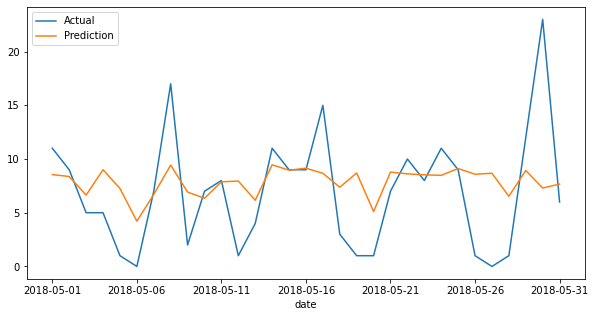

In [101]:
plot_predictions(testing_dates, y_test, y_pred)

In [102]:
evaluate_model(y_test, y_pred)

MAE: 3.6980085572538846
MSE: 25.435305814782282
MAPE: 1872607429405612.2

RMSE:  5.043


### Model Evaluation

While we did find MAE, MSE, MAPE and the RMSE, we can consider RMSE as both are similar but RMSE is in the same units as our target variable.
RMSE is more useful when large errors are particularly undesirable.

RMSE has the benefit of penalizing large errors more so can be more appropriate in some cases, for example, if being off by 10 is more than twice as bad as being off by 5. But if being off by 10 is just twice as bad as being off by 5, then MAE is more appropriate.

Since we are predicting accidents, a significantly large error could be more disastrous. Imagine a day when the actual accidents are to be 50 but the model predicts just 30. A large error of this kind could result in the county being unprepared to handle emergencies. Since RMSE would penalize such large errors, in this case, we could opt for a model with lower RMSE.

In either case, the Ramdom forest model has a lower MAE and lower RMSE and the next model which comes close is the LightGBM. Clearly, we could use the Random Forest model to predict accidents.